In [1]:
from sympy import Matrix, I, sqrt, symbols, exp, cos, sin, Symbol

del_1, del_2, delta = symbols(r"\delta_1, \delta_2 \delta", real=True)

H = X = Matrix([1, 0])
V = Y = Matrix([0, 1])

B = (1 / sqrt(2)) * Matrix([
    [1, I],
    [I, 1]
])
M = Matrix([
    [0, 1],
    [1, 0],
])
A = Matrix([
    [exp(I * del_1), 0],
    [0, exp(I * del_2)]
])
W2 = Matrix([
    [1, 0],
    [0, -1]
])
W4 = Matrix([
    [1, 0],
    [0, I]
])
H = (1 / sqrt(2)) * Matrix([
    [1, 1],
    [1, -1],
])
def R(t: float) -> Matrix:
    return Matrix([
        [cos(t), -sin(t)],
        [sin(t), cos(t)]
    ])

def W2T(t: float)-> Matrix:
    return R(t) * W2 * R(-t)

def W4T(t: float)-> Matrix:
    return R(t) * W4 * R(-t)

def prob(i: Matrix, o: Matrix, p: Matrix):
    return ((p * p.H * o * i).norm()**2).rewrite(cos).simplify()

## One qubit interferometer

In [23]:
prob(Y, B * A * B, X)

cos(\delta_1 - \delta_2)/2 + 1/2

In [25]:
from sympy import pi

_A = Matrix([
    [0, 1],
    [1, 0]
])

# prob(Y, H * _A * H, X) .subs(del_2, pi / 4).evalf()

(B * _A * M * B)

Matrix([
[0, I],
[I, 0]])

## Eraser

In [3]:
from sympy import BlockMatrix, eye, zeros
from sympy.physics.quantum import TensorProduct as ox

theta = 0
_W = Matrix(BlockMatrix([
    [W2T(theta), zeros(2)],
    [zeros(2), Matrix([[1, 0], [0, -1]])]
]))

Z = ox(B, eye(2)) * ox(A, eye(2)) * _W * ox(M, eye(2)) * ox(B, eye(2))

Z * ox(X, V)

Matrix([
[                                         0],
[-I*exp(I*\delta_1)/2 - I*exp(I*\delta_2)/2],
[                                         0],
[     exp(I*\delta_1)/2 - exp(I*\delta_2)/2]])

## Two photons in direction of propagation modes

In [112]:
from sympy.physics.quantum import TensorProduct as ox

Z = ox(B, B) * ox(A, A) * ox(M, M) * ox(B, B)

prob(ox(X, X), Z, ox(X, X))

cos(\delta_1 - \delta_2)/2 + cos(2*\delta_1 - 2*\delta_2)/8 + 3/8

In [86]:
prob(ox(X, X), Z, (1/sqrt(2)) * (ox(X, Y) + ox(Y, X)))

1/4 - cos(2*\delta_1 - 2*\delta_2)/4

In [103]:
(ox(B, B) * ox(_A, _A) * ox(B, B)).subs({del_2: pi/2})

Matrix([
[-I/2,  I/2,  I/2, -I/2],
[ I/2,  I/2, -I/2, -I/2],
[ I/2, -I/2,  I/2, -I/2],
[-I/2, -I/2, -I/2, -I/2]])

In [108]:
(B * _A * B).subs({del_2: pi/2})

Matrix([
[ 1/2 - I/2, -1/2 + I/2],
[-1/2 + I/2, -1/2 + I/2]])

## Class

In [6]:
def pr(a, b) -> Matrix:
    ket = ox(a, b)
    return ket * ket.H


prob(
    ox(X, X),
    (
        # ox(B, B) * pr(X, X)
        ox(B, eye(2)) * pr(X, Y)
        + ox(eye(2), B) * pr(Y, X)
        # + pr(Y, Y)
    ) * Z,
    (1/sqrt(2)) * (ox(X, Y) + ox(Y, X)),
)


1/8 - cos(2*\delta_1 - 2*\delta_2)/8

In [7]:
ox(A, A)

Matrix([
[exp(2*I*\delta_1),                               0,                               0,                 0],
[                0, exp(I*\delta_1)*exp(I*\delta_2),                               0,                 0],
[                0,                               0, exp(I*\delta_1)*exp(I*\delta_2),                 0],
[                0,                               0,                               0, exp(2*I*\delta_2)]])

In [8]:
(-(I/8) * (exp(I*del_1) + exp(I*del_1)) ** 2).rewrite(cos).simplify()

sin(2*\delta_1)/2 - I*cos(2*\delta_1)/2

### Quantum optics lab

In [35]:
from sympy.physics.matrices import msigma
from sympy import Matrix, I, sqrt, symbols, exp, cos, sin, Symbol, simplify

alpha, n_1, n_2, n_3 = symbols(r"\alpha n_1 n_2 n_3", real=True)

x = I * alpha * (n_1 * msigma(1) + n_2 * msigma(2) + n_3 * msigma(3))

x.exp().applyfunc(simplify).subs({
	n_1 ** 2 + n_2 ** 2 + n_3 ** 2: 1
})


Matrix([
[(n_3*exp(2*I*\alpha) - n_3 + exp(2*I*\alpha) + 1)*exp(-I*\alpha)/2, (n_1 - I*n_2)*(-(n_1**2 + n_2**2)*(n_3 + 1)*exp(2*I*\alpha) - (n_3 - 1)*(n_1**2 + n_2**2 + 2*n_3**2 + 2*n_3))*exp(-I*\alpha)/(2*(n_3 - 1)*(n_3 + 1)**2)],
[   (-n_1 - I*n_2 + (n_1 + I*n_2)*exp(2*I*\alpha))*exp(-I*\alpha)/2,                                                   (n_1**2 + n_2**2 + 2*n_3**2 + 2*n_3 + (n_1**2 + n_2**2)*exp(2*I*\alpha))*exp(-I*\alpha)/(2*(n_3 + 1))]])

In [38]:
from sympy import eye

cos(alpha) * eye(2) + I * sin(alpha) * (n_1 * msigma(1) + n_2 * msigma(2) + n_3 * msigma(3))

Matrix([
[I*n_3*sin(\alpha) + cos(\alpha),      I*(n_1 - I*n_2)*sin(\alpha)],
[    I*(n_1 + I*n_2)*sin(\alpha), -I*n_3*sin(\alpha) + cos(\alpha)]])

In [1]:
from sympy import Matrix, I, sqrt, symbols, exp, cos, sin, Symbol

alpha = symbols(r"\alpha", real=True)

H = Matrix([1, 0])
V = Matrix([0, 1])

W2 = Matrix([
    [1, 0],
    [0, -1]
])
W4 = Matrix([
    [1, 0],
    [0, I]
])

def R(t: float) -> Matrix:
    return Matrix([
        [cos(t), -sin(t)],
        [sin(t), cos(t)]
    ])

def W2T(t: float)-> Matrix:
    return R(t) * W2 * R(-t)

def W4T(t: float)-> Matrix:
    return R(t) * W4 * R(-t)

psi = W4T(alpha) * H

(psi * psi.H * msigma(3)).trace().simplify()

NameError: name 'msigma' is not defined

In [81]:
s_1 = psi * psi.H * msigma(1)
s_2 = psi * psi.H * msigma(2)
s_3 = psi * psi.H * msigma(3)

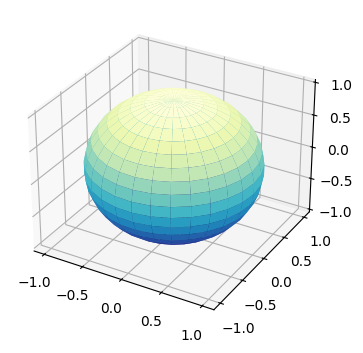

In [80]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)

points = []
for i in np.linspace(0, )

plt.show()